 **Facial Keypoint Detection**          
 First of all let's discuss what we are given.        
We are given three CSV files.        
training.csv :- Its has coordinates of facial keypoints like left eye, rigth eye etc and also the image.      
test.csv :- Its has image only and we have to give coordinates of various facial keypoints by looking at third csv file which is IdLookupTable.csv     
Rest everything is explained below.      
**I would really appreciate if you could upvote this kernel.**


In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [72]:
Train_Dir='../input/training/training.csv'
Test_Dir='../input/test/test.csv'
lookid_data='../input/IdLookupTable.csv'
train_data=pd.read_csv(Train_Dir)
test_data=pd.read_csv(Test_Dir)
lookid_data=pd.read_csv(lookid_data)
os.listdir('../input')

['test', 'training', 'SampleSubmission.csv', 'IdLookupTable.csv']

Lets explore our dataset

In [73]:
train_data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7009,7010,7011,7012,7013,7014,7015,7016,7017,7018,7019,7020,7021,7022,7023,7024,7025,7026,7027,7028,7029,7030,7031,7032,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042,7043,7044,7045,7046,7047,7048
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253,69.6807,64.1319,67.4689,65.8029,64.1212,65.2302,66.7376,66.5747,65.2706,66.6072,68.4913,66.6769,66.8504,67.8395,69.2335,65.5956,64.7625,66.0827,64.7186,66.3343,64.553,65.3184,65.4594,65.3769,72.3532,64.1556,64.9563,69.4418,67.5089,65.3781,66.0595,64.7125,66.215,67.0397,64.3325,...,66.6593,65.2627,66.3166,67.9037,66.4645,66.301,67.1193,64.8367,65.3903,62.3849,65.6084,61.9972,64.9061,67.0451,60.2021,72.2262,67.7241,63.0133,67.2779,65.84,69.4632,64.3929,67.3677,68.3209,66.162,66.6519,70.5049,71.2582,69.6162,64.6155,69.2299,63.353,65.7112,67.9293,66.8672,67.4025,66.1344,66.6907,70.9651,66.9383
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213,39.9687,34.29,39.4135,34.7552,36.7403,34.3426,39.8864,37.308,34.9402,38.9381,35.9002,33.9412,35.637,38.5979,40.0215,36.6264,34.9334,37.1537,35.8612,33.7213,36.5242,35.2704,38.9086,38.1289,34.4171,35.2538,35.2355,37.8516,35.7277,35.632,36.8486,34.2681,35.6378,32.372,34.6073,...,40.0731,36.2124,43.8757,41.7278,37.9797,35.7512,37.9044,35.2976,32.2801,32.2983,37.6214,37.2758,41.8102,41.7374,37.7435,40.0464,38.876,36.0536,37.3832,39.1238,41.0387,38.2252,38.0488,36.8326,35.9309,37.3327,35.7834,39.7446,38.0495,35.1653,38.5756,35.6713,38.8435,35.8466,37.3569,31.8426,38.3655,36.8452,39.8537,43.4245
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448,29.1836,29.579,29.356,27.4758,29.4689,28.8027,30.2704,30.4453,33.0227,28.5962,27.8312,30.7136,32.5281,28.0167,25.5508,31.5408,31.8597,27.9783,31.5907,29.0771,32.2198,30.3096,32.0514,29.2155,28.6554,30.7579,29.1167,28.6935,30.6683,30.191,26.5891,30.8571,30.4626,27.1397,32.8899,...,31.0751,29.3557,28.1583,34.0728,30.0619,30.8998,33.7967,31.2624,28.2914,32.7659,31.2643,31.4254,30.5803,29.8587,38.6491,33.0462,29.3992,28.7469,29.1766,29.494,33.8927,29.21,28.6823,29.1977,33.1005,29.2966,32.1823,33.4652,29.494,26.7072,29.4079,33.9521,32.2688,28.6878,30.7509,29.7467,30.4786,31.6664,30.5433,31.0961
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042,37.5634,33.138,39.6217,36.1856,38.3902,33.9378,38.8144,37.308,32.9769,36.3032,37.0221,36.1495,36.5246,36.3977,38.0719,39.3078,37.1915,37.436,39.1194,34.0977,38.0786,38.7026,39.2602,39.5589,32.828,35.2538,35.2355,35.6967,33.6292,34.3974,37.7069,32.2253,37.5031,32.372,37.2519,...,35.5442,42.2983,37.3487,38.4538,39.0829,36.8461,38.2101,40.0939,36.1694,40.8549,38.459,37.9127,36.566,38.177,37.4441,37.8698,37.9297,38.0497,40.6963,42.3241,41.8064,38.6517,37.8144,37.5662,34.9929,37.8341,39.0827,36.6878,42.5967,39.8279,38.3455,40.8164,37.706,41.4525,40.1157,38.6329,39.9502,39.685,40.7723,39.5286
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659,62.8643,57.7972,59.555,58.6522,58.6209,58.7538,61.0176,59.0362,60.5032,61.7145,62.3222,60.3671,61.2288,60.1393,60.2627,59.1474,59.9242,59.8731,59.2879,59.9368,58.4007,60.1705,59.8324,58.4306,63.8785,57.2384,59.201,62.585,61.2136,59.5131,60.0528,58.8754,59.9972,60.3898,59.6305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213,40.1693,35.154,40.4548,37.3293,37.8406,35.5571,39.8864,38.2768,34.9402,38.9381,36.1807,35.2031,36.5246,39.698,40.0215,37.9068,35.9011,38.2828,37.762,34.8497,37.5387,36.2995,39.6119,39.3545,34.9467,36.1483,36.5438,38.2435,36.8932,36.558,37.7069,34.8519,36.5704,33.2301,35.4888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.51

Lets check for missing values

In [74]:
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

So there are missing values in 28 columns. We can do two things here one remove the rows having missing values and another is the fill missing values with something. I used two option as removing rows will reduce our dataset. 
I filled the missing values with the previous values in that row.

In [75]:
train_data.fillna(method='ffill',inplace=True)
# train_data=dropna(inplace=True)


Lets check for missing values now

In [76]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

As there is no missing values we can now separate the labels and features.
The image is our feature and other values are labes that we have to predict later.
As image column values are in string format and there is also some missing values so we have to split the string by space and append it and also handling missing values

In [106]:
imag=[]
for i in range(0,7049):
    img=train_data['Image'][i].split(' ')
#     img = ['0' if x == '' else x for x in img]
    imag.append(img)   


In [107]:
image_list=np.array(imag,dtype='float')
x_train=image_list.reshape(-1,96,96)


Lets reshape and convert it into float value.

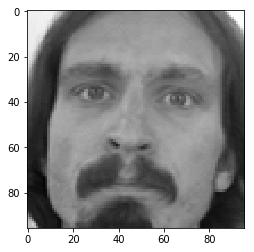

In [109]:
plt.imshow(x_train[0],cmap='gray')
plt.show()

Lets see what is the first image.

Now lets separate labels.

In [117]:
training=train_data.drop('Image',axis=1)

y_train=[]
for i in range(0,7049):
    y=training.iloc[i,:]
    y_train.append(y)
   
y_train =np.array(y_train,dtype='float')
y_train

array([[66.03356391, 39.00227368, 30.22700752, ..., 72.93545865,
        43.13070677, 84.48577444],
       [64.33293617, 34.9700766 , 29.9492766 , ..., 70.26655319,
        45.46791489, 85.48017021],
       [65.05705263, 34.90964211, 30.90378947, ..., 70.19178947,
        47.27494737, 78.65936842],
       ...,
       [66.69073171, 36.84522146, 31.66641951, ..., 75.96359236,
        49.46257171, 78.11712   ],
       [70.96508235, 39.85366588, 30.54328471, ..., 75.96359236,
        50.06518588, 79.58644706],
       [66.93831111, 43.42450963, 31.09605926, ..., 75.96359236,
        45.90048   , 82.7730963 ]])

As our data is ready for training , lets define our model. I am using keras and simple dense layers. For loss function I am using 'mse' ( mean squared error ) as we have to predict new values. Our result evaluted on the basics of 'mae' ( mean absolute error ) . 

In [168]:

import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

# fashion_model = Sequential()
# fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))

model= Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(96,96,1)))
# model.add(MaxPooling2D((2,2),padding='same'))
# model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
# model.add(MaxPooling2D((2,2),padding='same'))
# model.add(Conv2D(128, kernel_size=(3, 3),activation='relu'))
# model.add(MaxPooling2D((2,2),padding='same'))
model.add( Dense(128,activation='relu'))
model.add( Dense(128,activation='relu'))
model.add( Dense(128,activation='relu'))

model.compile(optimizer='adam',loss='mse',metrics=['mae','accuracy'])
model.summary()
model.fit(x_train, y_train, batch_size=128,epochs=20,verbose=1)
# model.fit(x_train,y_train,epochs = 500,batch_size = 1,validation_split = 0.2)


# model= Sequential ([Flatten(input_shape=(96,96)),
#                    Dense(128,activation='relu'),
#                    Dropout(0.1),
#                    Dense(128,activation='relu')
#                    Dense(32)
#                    ])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 94, 94, 32)        320       
_________________________________________________________________
dense_76 (Dense)             (None, 94, 94, 128)       4224      
_________________________________________________________________
dense_77 (Dense)             (None, 94, 94, 128)       16512     
_________________________________________________________________
dense_78 (Dense)             (None, 94, 94, 128)       16512     
Total params: 37,568
Trainable params: 37,568
Non-trainable params: 0
_________________________________________________________________


ValueError: Error when checking input: expected conv2d_71_input to have 4 dimensions, but got array with shape (7049, 96, 96)

Now our model is defined and we will train it by calling fit method. I ran it for 500 iteration keeping batch size and validtion set size as 20% ( 20% of the training data will be kept for validating the model ).

Now lets prepare our testing data

Reshaping and converting 

Lets see first image in out test data

Lets predict our results

Now the last step is the create our submission file keeping in the mind required format.
There should be two columns :- RowId and Location
Location column values should be filled according the lookup table provided ( IdLookupTable.csv)
